In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter03/autompg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carname
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carname
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


### Data Preparation

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
carname         0
dtype: int64

In [6]:
df.horsepower.fillna(df.horsepower.median(), inplace=True)

In [13]:
# create feature & response variables
X = df.iloc[:,1:8]
y = df.iloc[:,0]
X=np.array(X)
y=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

### Model Train

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Without Cross Validaiton

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print(f'R squared: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R squared: 0.8472274567567305
MSE: 8.932143374072547


Text(0, 0.5, 'Predicted mpg')

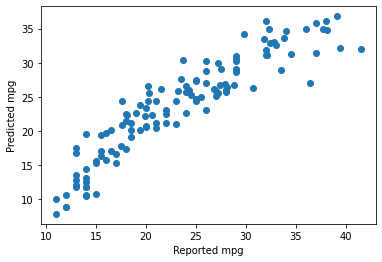

In [20]:
## Let us plot the model
plt.scatter(y_test, y_pred)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

#### Cross Validation

##### K-Fold

In [21]:
from sklearn.model_selection import KFold

In [22]:
kfold = KFold(n_splits=10)
kf_ytests = []
kf_ypreds = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    kf_ytests += list(y_test)
    kf_ypreds += list(y_pred)

In [24]:
print(f'R squared: {r2_score(kf_ytests, kf_ypreds)}')
print(f'MSE: {mean_squared_error(kf_ytests, kf_ypreds)}')

R squared: 0.7891996650092288
MSE: 12.845354359352084


Text(0, 0.5, 'Predicted mpg')

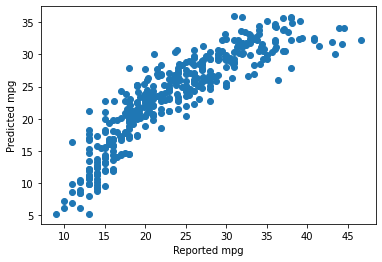

In [23]:
plt.scatter(kf_ytests, kf_ypreds)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

##### LOOC

In [25]:
from sklearn.model_selection import LeaveOneOut

In [26]:
looc = LeaveOneOut()
looc_ytests = []
looc_ypreds = []

for train_idx, test_idx in looc.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    looc_ytests += list(y_test)
    looc_ypreds += list(y_pred)

In [27]:
print(f'R squared: {r2_score(looc_ytests, looc_ypreds)}')
print(f'MSE: {mean_squared_error(looc_ytests, looc_ypreds)}')

R squared: 0.8123626232113552
MSE: 11.433893575239953


Text(0, 0.5, 'Predicted mpg')

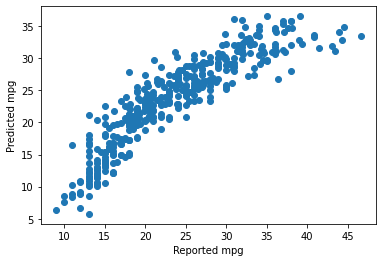

In [28]:
plt.scatter(looc_ytests, looc_ypreds)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

#### Bootstrap

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.utils import resample

In [30]:
def create_bootstrap_oob(df):
    global df_OOB
    global df_BS

    df_BS = resample(df, replace=True, n_samples=100)

    bs_idx = tuple(df_BS.index)
    df_OOB = df[~df.index.isin(bs_idx)]

In [32]:
it = 50
bs_stat = list()
original_sample_stat = list()

for i in range(it):
    create_bootstrap_oob(df)

    bs_stat.append(df_BS.iloc[:,0].mean())

    original_sample_stat.append(df_OOB['mpg'].mean())

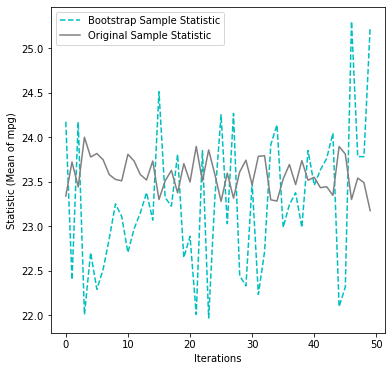

In [33]:
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(bs_stat, 'c--', label='Bootstrap Sample Statistic')
plt.plot(original_sample_stat, 'grey', label='Original Sample Statistic')
plt.xlabel('Iterations')
plt.ylabel('Statistic (Mean of mpg)')
plt.legend()
plt.show()

In [34]:
it=50
mse_each_iterations = list()
lm=SGDRegressor()
total_mse=0
average_mse= list()

for i in range(it):
    create_bootstrap_oob(df)
    X_BS = df_BS.iloc[:,1:8]
    y_BS = df_BS.iloc[:,0]

    X_OOB = df_OOB.iloc[:,1:8]
    y_OOB = df_OOB.iloc[:,0]

    model = SGDRegressor()
    model.fit(X_BS, y_BS)

    y_pred = model.predict(X_OOB)
    mse = mean_squared_error(y_OOB, y_pred)

    mse_each_iterations.append(mse)
    total_mse += mse
    average_mse.append(total_mse/i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


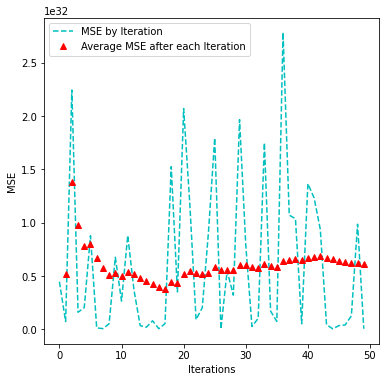

In [36]:
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(mse_each_iterations, 'c--', label='MSE by Iteration')
plt.plot(average_mse, 'r^', label='Average MSE after each Iteration')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()